In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [84]:
df=pd.read_csv("cars.csv")
df.sample(5)

,brand,km_driven,fuel,owner,selling_price
1564,Jeep,17000,Petrol,First Owner,4100000
6633,Nissan,212000,Diesel,First Owner,375000
4258,Tata,110000,Diesel,First Owner,503000
3173,Maruti,38000,Diesel,Second Owner,525000
6931,Chevrolet,100000,Diesel,Third Owner,225000


<Axes: xlabel='count', ylabel='owner'>

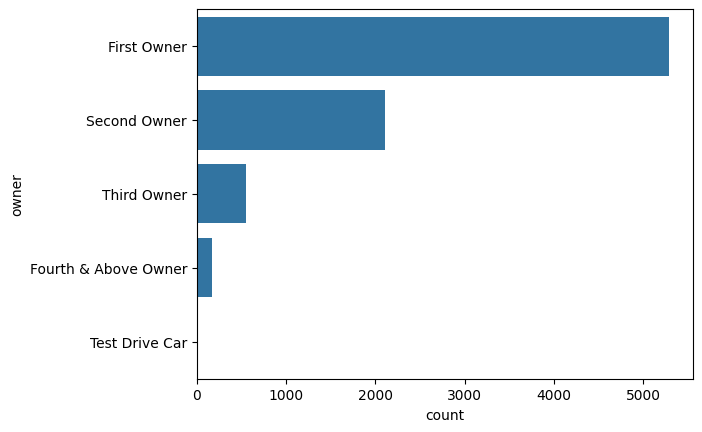

In [85]:
sns.countplot(df["owner"])

In [86]:
pd.crosstab(df["brand"],df["fuel"])

fuel,CNG,Diesel,LPG,Petrol
brand,,,,
Ambassador,0,4,0,0
Ashok,0,1,0,0
Audi,0,35,0,5
BMW,0,117,0,3
Chevrolet,0,129,2,99
Daewoo,0,0,0,3
Datsun,0,0,0,65
Fiat,0,36,0,11
Force,0,6,0,0


<Axes: xlabel='count', ylabel='brand'>

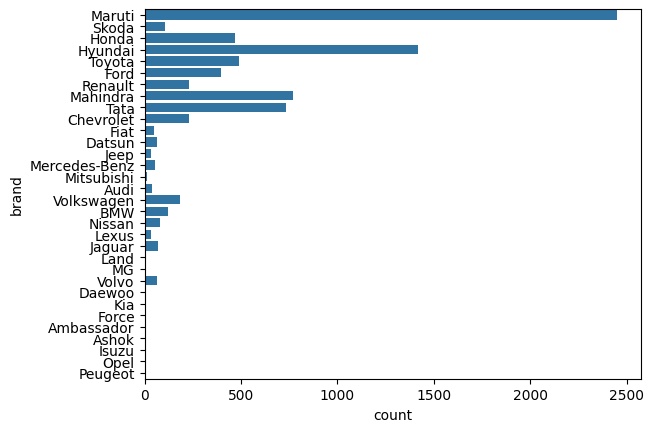

In [87]:
sns.countplot(df["brand"])

In [88]:
df["brand"].value_counts().nunique()

27

In [89]:
df["fuel"].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [90]:
df["owner"].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [91]:
pd.get_dummies(df,columns=["fuel","owner"],drop_first=True) #OneHotEncoding using pandas 

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,True,False,False,False,False,False,False
1,Skoda,120000,370000,True,False,False,False,True,False,False
2,Honda,140000,158000,False,False,True,False,False,False,True
3,Hyundai,127000,225000,True,False,False,False,False,False,False
4,Maruti,120000,130000,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,True,False,False,False,False
8124,Hyundai,119000,135000,True,False,False,True,False,False,False
8125,Maruti,120000,382000,True,False,False,False,False,False,False
8126,Tata,25000,290000,True,False,False,False,False,False,False


In [92]:
x=df[["brand","km_driven","fuel","owner"]]
y=df[["selling_price"]]
#Make the variable of dependent and independent variable.

In [93]:
#Now train test the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [94]:
x_train.sample()

,brand,km_driven,fuel,owner
4150,Tata,90000,Diesel,Third Owner


In [105]:
Ohe=OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)

In [106]:
x_train_new=Ohe.fit_transform(x_train[["fuel","owner"]])

In [107]:
x_test_new=Ohe.fit_transform(x_test[["fuel","owner"]])

In [108]:
np.hstack((x_train[["brand","km_driven"]].values,x_train_new))

array([['Tata', 2560, 0, ..., 0, 0, 0],
       ['Honda', 80000, 0, ..., 1, 0, 0],
       ['Hyundai', 150000, 1, ..., 0, 0, 0],
       ...,
       ['Hyundai', 35000, 0, ..., 0, 0, 0],
       ['Maruti', 27000, 1, ..., 0, 0, 0],
       ['Maruti', 70000, 0, ..., 1, 0, 0]], dtype=object)

In [121]:
counts=df["brand"].value_counts()

In [122]:
df["brand"].nunique()
threshold=100

In [125]:
rep1=counts[counts<threshold].index
rep1

Index(['Nissan', 'Jaguar', 'Volvo', 'Datsun', 'Mercedes-Benz', 'Fiat', 'Audi',
       'Lexus', 'Jeep', 'Mitsubishi', 'Force', 'Land', 'Isuzu', 'Kia',
       'Ambassador', 'Daewoo', 'MG', 'Ashok', 'Opel', 'Peugeot'],
      dtype='object', name='brand')

In [128]:
df=pd.get_dummies(df["brand"].replace(rep1,"uncommon"))

In [132]:
df.sample(5)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
4443,False,False,False,False,False,False,True,False,False,False,False,False,False
6369,False,False,False,False,True,False,False,False,False,False,False,False,False
3475,False,False,False,False,True,False,False,False,False,False,False,False,False
5413,False,False,False,False,False,False,True,False,False,False,False,False,False
7289,False,True,False,False,False,False,False,False,False,False,False,False,False
